<a href="https://colab.research.google.com/github/austinbrehm/predict-bike-rentals/blob/master/bike_rentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 [==============================] - 0s 76ms/step
[[983.69525]]


[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 0,
 array([[-0.5700165 , -0.58855236,  0.12901016,  0.2124163 , -0.32824746],
        [-0.5456725 , -0.13535114,  0.69575834, -0.11890085, -0.2674342 ],
        [-0.18391553,  0.02132236,  0.2650844 ,  0.30022845, -0.10109326],
        [ 0.57241   ,  0.13692951,  0.25229403, -0.16320555,  0.22014558],
        [ 0.38856047, -0.10171466,  0.1556292 , -0.0036631 ,  0.4329518 ],
        [-0.19648653, -0.74149305,  0.15597972,  0.21139881, -0.14348742],
        [-0.05914384,  0.4402397 ,  0.5960119 ,  0.33426937,  0.47823024],
        [-0.38718605,  0.50891805,  0.3692831 , -0.13172248,  0.5303749 ],
        [ 0.4080453 ,  0.10080674,  0.30738276, -0.08072936, -0.36119604],
        [ 0.0163579 , -0.5335193 ,  0.16690354, -0.5389037 , -0.1740604 ],
        [-0.43355903, -0.07282672,  0.45675194,  0.59351933, -0.40984878],
        [-0.17928

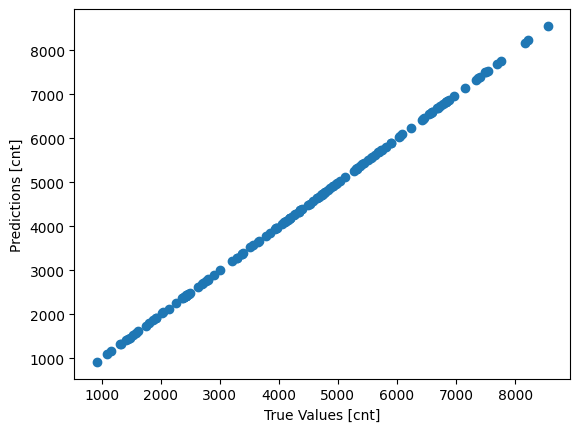

In [ ]:
import pandas as pd 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt


# import data
raw_data = pd.read_csv('day.csv')

# create a copy of the data
data = raw_data.copy()

# split data
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)

# plot data
#sns.pairplot(train_data, diag_kind = 'kde')

# split features from labels
train_features = train_data.copy()
test_features = test_data.copy()

train_labels = train_features.pop('cnt')
test_labels = test_features.pop('cnt')

# find mean and standard deviation of all features 
train_data.describe().transpose()[['mean', 'std']]

# normalize features
normalizer = tf.keras.layers.Normalization()
normalized_train_features = normalizer(np.array(train_features))
normalized_train_features = normalizer(np.array(train_features))

# linear regression with DNN and multiple features (13 features)
model = Sequential([
    normalizer,
    Dense(5, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1)
])

model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)


def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [cnt]')
  plt.legend()
  plt.grid(True)


# plot_loss(history)

predicted_test_labels = model.predict(test_features)
plt.scatter(test_labels, predicted_test_labels)
plt.xlabel('True Values [cnt]')
plt.ylabel('Predictions [cnt]')


new_prediction = model.predict([1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654])
print(new_prediction)
model.get_weights()
#model.save('bike_rentals_model')
